In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cleaned_std_perf.csv')
df.head()

,gender,race_ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score,average_score,alchol_consumption,family_support,internet_access,avg_studytime(hrs),grade,absent_percent
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,Low,Yes,Yes,6,C,11
1,female,group C,some college,standard,completed,69,90,88,82.33,Low,Yes,Yes,6,B,11
2,female,group B,master's degree,standard,none,90,95,93,92.67,Low,Yes,Yes,8,A,10
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,Moderate,No,No,2,F,48
4,male,group C,some college,standard,none,76,78,75,76.33,Low,Yes,Yes,6,C,16


# INSIGHTS

### Average Absence vs Grade

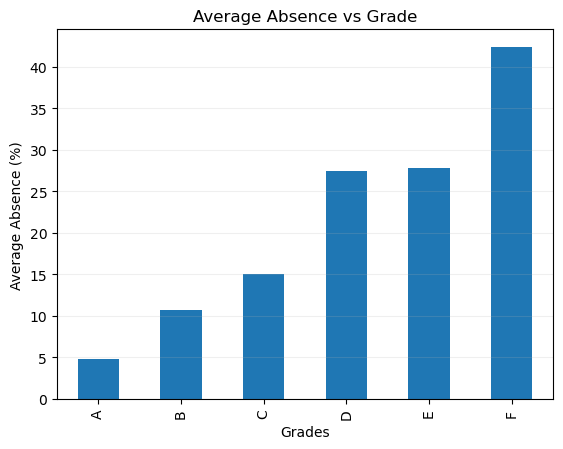

In [3]:
avg_absence = df.groupby('grade')['absent_percent'].mean()

avg_absence.plot(kind='bar')
plt.title('Average Absence vs Grade')
plt.xlabel('Grades')
plt.ylabel('Average Absence (%)')
plt.grid(True, axis='y', alpha= 0.2)
plt.show()

So as we can conclude following things :
1. The students with good scores low absence compared to students having bad scores.
2. Students should attend the classes on a daily basis in order to score good marks in the paper.

### Final Grades vs Internet Access

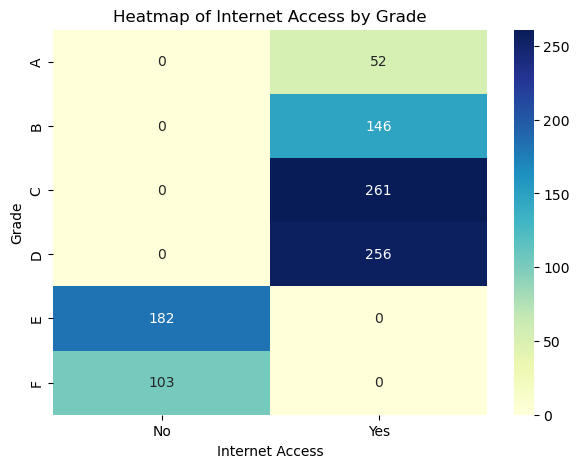

In [4]:
cross_tab = pd.crosstab(df['grade'], df['internet_access']).reindex(['A','B','C','D','E','F'])

plt.figure(figsize=(7,5))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap of Internet Access by Grade")
plt.xlabel("Internet Access")
plt.ylabel("Grade")
plt.show()

So by the above heatmap we can say that most of the students having internet access score average marks while the students scoring higher marks are either do not have internet or they usage of internet is limited.

So we can conclude that :
1. People having low grades spend most of their time on internet for surfing social media.
2. People scoring high grades restrict themselves from using excessive amount of internet.

### Final Grade vs Family Support

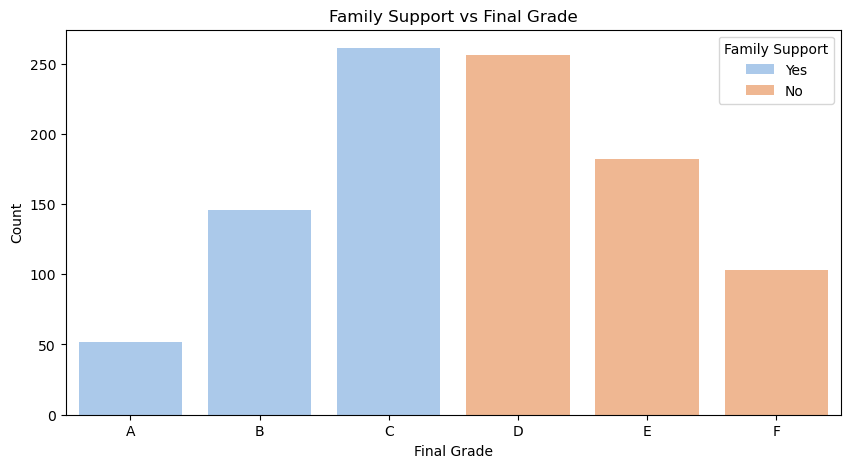

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(x='grade', hue='family_support', data=df, palette='pastel', order=['A', 'B', 'C', 'D', 'E', 'F'])
plt.title('Family Support vs Final Grade')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.legend(title='Family Support')
plt.show()

So by the above bar graph we can generate the insight that people having family support score good or moderate grades, while the people without family support score below average grades in the tests.

We can conclude that :
1. Students having family support do not have to worry about other essential needs.
2. Those who do not have family support have to work harder than other students.

### Final Grade vs Alcohol Consumption

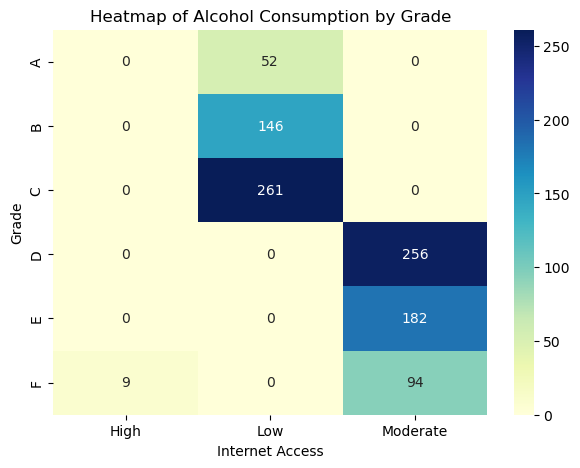

In [6]:
cross_tab = pd.crosstab(df['grade'], df['alchol_consumption']).reindex(['A','B','C','D','E','F'])

plt.figure(figsize=(7,5))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap of Alcohol Consumption by Grade")
plt.xlabel("Internet Access")
plt.ylabel("Grade")
plt.show()

So here we can see that most of the people scoring good or above average marks consume less or none amount of alcohol while the people having bad scores or below average they consume more alcohol.

We can conclude that :
1. Students should not consume alcohol or else if they are trying to consume they should consume in less amount.
2. Students should focus on their career rather than acquiring bad habits.

# Visualization

### Histogram of Grades

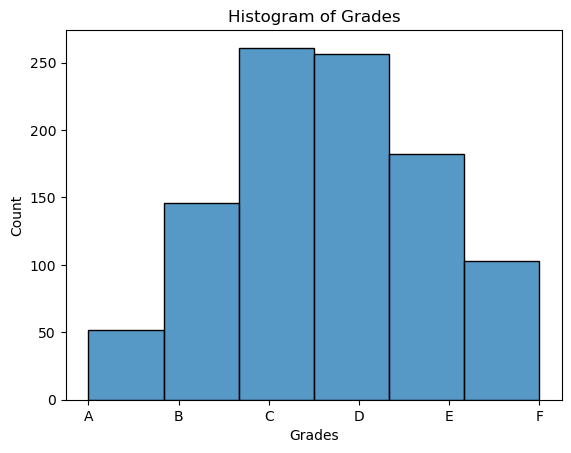

In [7]:
grade_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6}
df['grade_numeric'] = df['grade'].map(grade_map)

sns.histplot(df['grade_numeric'], bins=6)
plt.xlabel("Grades")
plt.title("Histogram of Grades")
plt.xticks(ticks=[1, 2, 3, 4, 5, 6], labels=['A', 'B', 'C', 'D', 'E', 'F'])
plt.show()

### Bar plots comparing male vs female performance

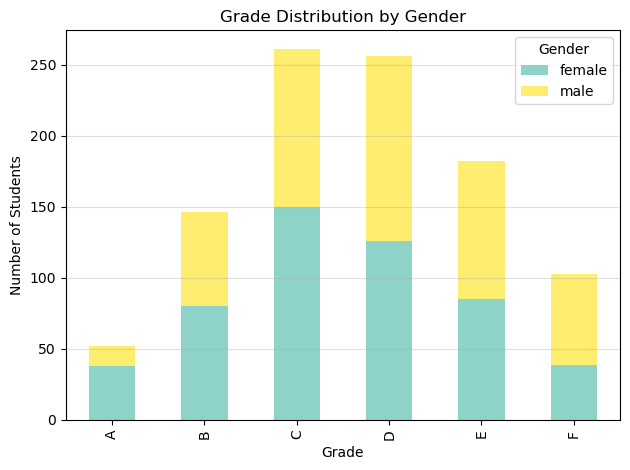

In [8]:
grade_gender_counts = df.groupby('grade')['gender'].value_counts().unstack()

grade_order = ['A', 'B', 'C', 'D', 'E', 'F']
grade_gender_counts = grade_gender_counts.reindex(grade_order)

grade_gender_counts.plot(kind='bar', stacked=True, cmap='Set3')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.title('Grade Distribution by Gender')
plt.legend(title='Gender')
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()

### Line chart of grades vs study time

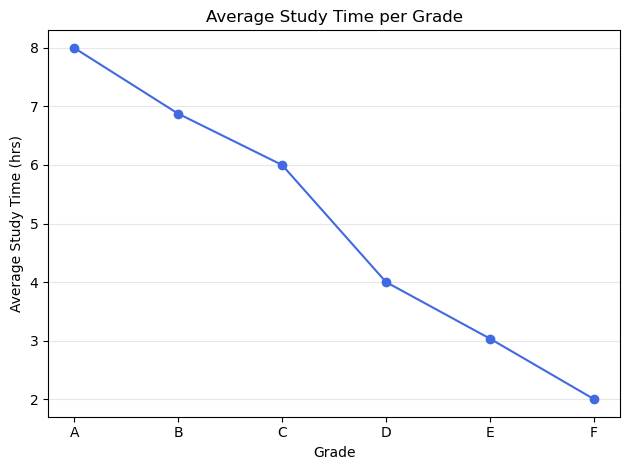

In [9]:
grade_order = ['A', 'B', 'C', 'D', 'E', 'F']

avg_study = df.groupby('grade')['avg_studytime(hrs)'].mean().reindex(grade_order)

avg_study.plot(kind='line', marker='o', color='royalblue')
plt.xlabel('Grade')
plt.ylabel('Average Study Time (hrs)')
plt.title('Average Study Time per Grade')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Heatmap of correlations between academic and personal attributes

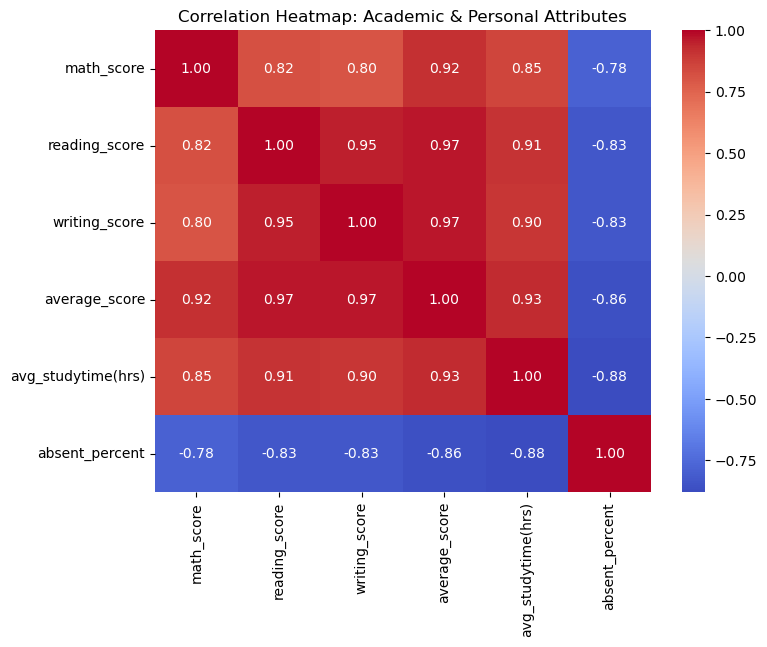

In [10]:
numeric_cols = [
    'math_score', 'reading_score', 'writing_score',
    'average_score', 'avg_studytime(hrs)', 'absent_percent'
]

corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Academic & Personal Attributes")
plt.show()

### Gender Distribution on the basis of alcohol consumption

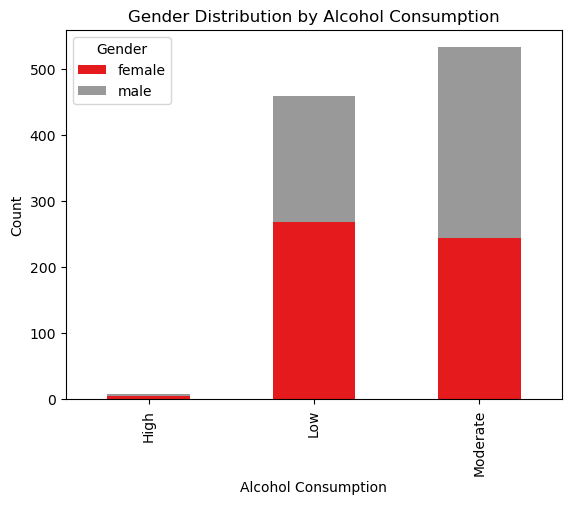

In [11]:
gender_dist = df.groupby('alchol_consumption')['gender'].value_counts().unstack()

gender_dist.plot(kind='bar', stacked=True, cmap='Set1')
plt.title('Gender Distribution by Alcohol Consumption')
plt.ylabel('Count')
plt.xlabel('Alcohol Consumption')
plt.legend(title='Gender')
plt.show()

### Pie Distribution of students on the basis education level

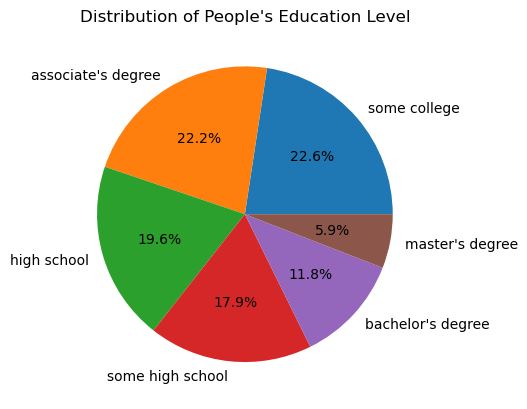

In [12]:
edu_level = df['parental_education'].value_counts()

plt.pie(edu_level, labels=edu_level.index ,autopct='%.1f%%')
plt.title("Distribution of People's Education Level")
plt.show()